<!--NAVIGATION-->
< [深入：决策树和随机森林](05.08-Random-Forests.ipynb) | [目录](Index.ipynb) | [深入：流形学习](05.10-Manifold-Learning.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


#  In Depth: Principal Component Analysis

# 深入：主成分分析

> Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data.
Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

目前为止我们深入了解了一些有监督学习评估器：这些评估器构建在标记的训练数据的基础之上。下面我们看一些无监督学习评估器，它们能在没有已知标签的情况下聚焦在数据的有意义的特征上。

> In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA).
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

本节中，我们将讨论一个可能使用最广泛的无监督学习算法，主成分分析（PCA）。PCA本质上是一个降维算法，但是它也可以作为可视化、过滤噪音、特征提取和特征工程等方面的有用工具。在对PCA算法概念进行简要介绍之后，我们会看到其应用的一些场景。

> We begin with the standard imports:

首先导入需要的包：

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

## 主成分分析简介

> Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb).
Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points:

主成分分析是一个快速而灵活的无监督学习算法，主要用于降低数据的维度，我们在[Scikit-Learn简介](05.02-Introducing-Scikit-Learn.ipynb)中已经简短地介绍过它。在下面的二维数据集中，能更方便我们理解PCA方法。例如下面200个数据点：

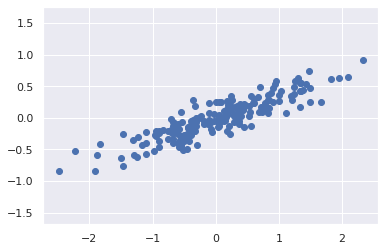

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

> By eye, it is clear that there is a nearly linear relationship between the x and y variables.
This is reminiscent of the linear regression data we explored in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb), but the problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

肉眼就能清晰观察到x和y变量之间的线性关系。这种线性关系让我们想起在[深入：线性回归](05.06-Linear-Regression.ipynb)中介绍的内容，但是本节问题有一点不同：我们不是希望训练一个可以通过x值预测y值的模型，而是希望模型能够学习到x和y值之间的*关联*。

> In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

在主成分分析中，这种关联关系被量化成在数据中找到一个*主要特征轴*的列表，然后使用这些轴来描绘数据集。使用Scikit-Learn的`PCA`评估器，我们可以进行如下计算：

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

> The fit learns some quantities from the data, most importantly the "components" and "explained variance":

拟合过程从数据中学习到了一些定量指标，最重要的是其中的“成分”和“可解释方差”：

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


> To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

要展示这些数值代表的含义，可以把它们可视化成输入数据上的矢量，使用“成分”来确定矢量的方向，“可解释方差”用来确定矢量的长度：

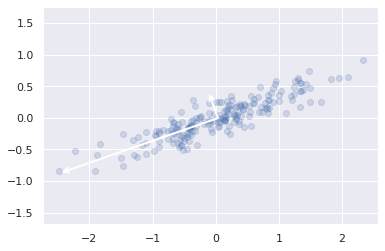

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

> These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

这些矢量代表着数据的*主要特征轴*，而矢量的长度代表着这个轴对于数据的分布起到了*多重要*的作用，更精确来说，这是数据被投射到这个轴上时方差的度量。将每个数据点投射到主要特征轴上被称为数据的“主要成分”。

> If we plot these principal components beside the original data, we see the plots shown here:

如果我们将主要成分画在原始数据旁边，会得到下图：

![](figures/05.09-PCA-rotation.png)
[附录中生成图像的代码](06.00-Figure-Code.ipynb#Principal-Components-Rotation)

> This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

这种将数据轴变换成主要特征轴的方法被称为*仿射变换*，仿射变换基本上上可以通过转换、旋转和统一比例完成。

> While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

虽然这个查找主成分的算法看起来就像数学理论而已，但是实际上它在机器学习和数据挖掘领域有着非常广泛的应用。

### PCA as dimensionality reduction

### 使用PCA降维

> Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

使用PCA降维主要包括将一个或多个次要成分从数据中移除，从而获得数据的一个低维度的映射并保留最大化的数据差异。

> Here is an example of using PCA as a dimensionality reduction transform:

下面是一个使用PCA进行降维转换的例子：

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


> The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

转换后的数据被减成了一维。要理解降维的效果，我们可以将数据进行逆转换并将它们沿着原始数据的方向绘制在图中：

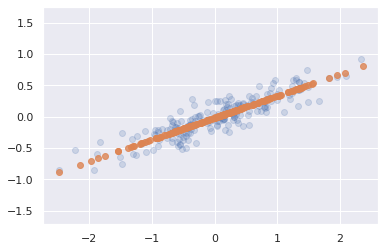

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

> The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

浅色的点代表原始数据，而深色的点是放射变换的得到的数据。上图清晰地表示了PCA降维的含义：沿着非重要维度上的信息都被移除了，只留下了具有高差异性维度上的数据。被移除的差异部分（按比例体现在图中深色线的数据点分布情况中）是降维操作中多少*信息*被丢弃了的粗略衡量。

> This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

降维后的数据集与原始数据点之间，在某种程度上具有“足够”重要关联的编码表达：虽然将数据的维度减少了一半，但是数据点之间的整体联系大部分被保留了下来。

### PCA for visualization: Hand-written digits

### 使用PCA进行可视化：手写数字

> The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data we saw in [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb).

当数据仅有两个维度时，降维的效果并不明显，但是在高维度数据的情况下，这个操作的威力就体现出来了。为了展示这点，让我们将PCA应用在手写数字数据上，我们在[深入：决策树和随机森林](05.08-Random-Forests.ipynb)中已经看到过它的应用。

> We start by loading the data:

首先载入数据：

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

> Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

我们前面知道数据是由8x8像素的图像构成，这表示数据共有64个维度。要获得这些数据点之间的内在联系，我们可以使用PCA将它们投射到更容易管理的维度数量上，例如2：

In [10]:
pca = PCA(2)  # 将64维数据投射到2维上
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


> We can now plot the first two principal components of each point to learn about the data:

然后我们就可以将数据的两个主成分绘制在下图中：

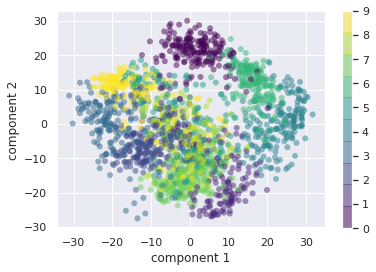

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

> Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

回忆一下这些成分的含义：完整的数据是64维的数据点组成的云，上图中的点是每个数据点投射到最大差异方向上的投射点。或者说基本上，我们找到了通过最优的拉伸和旋转将64维数据展示在2维上的方式，并且采取的是一种无监督的手段，也就是没有任何的标签参考。

### What do the components mean?

### 成分的内在涵义

> We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

> $$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

下面继续深入探讨一下，提出问题，这个降维之后的结果究竟有什么意义。我们可以通过基本矢量的组合来理解它。例如训练集中的每张图像都是64个像素值的集合，我们把它称为$x$：

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

> One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

> $$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

用计算机图像基础术语来说的话，就是要构成一张图像，我们将上面的向量中的每个元素乘上它所代表的像素点，然后将这些结果加起来就能得到图像：

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

> One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

可以认为降维就是将除了需要保留的基础矢量外的部分全部移除。例如如果我们仅使用前面8个像素，我们就能得到8维的数据投射，但是结果并不能完整展示原图：因为我们丢弃了接近90%的像素。

![](figures/05.09-digits-pixel-components.png)
[附录中生成图像的代码](06.00-Figure-Code.ipynb#Digits-Pixel-Components)

> The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

上图中第一行展示的是单独的像素点，第二行展示的是对应的像素点加入后对累计求和结果产生的影响。仅使用8个像素点基础成分时，我们只能构建64像素图像的一小部分。继续这个过程将所有64个像素相加后，我们就能恢复原始图像。

> But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

> $$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

但是逐个像素点的表示方式不是唯一的选择。我们可以使用其他的基本函数，其中包含着每个像素对图像的预设影响值，比方说写成

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

> PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

PCA可以想象成选择最优的基本函数，在这个函数当中只需要将头几项相加就能重建数据集的主要部分。主成分作为数据的低维度表示，其实就是这个函数当中的头几项的系数。下图展示了使用平均值加上头8个PCA基本函数后重建的图像情况：

![](figures/05.09-digits-pca-components.png)
[附录中生成图像的代码](06.00-Figure-Code.ipynb#Digits-PCA-Components)

> Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

不同于图像的像素表达，PCA允许我们仅使用平均值加上8个成分就还原了原始图像中的显著特征。还原图中的每个像素都是我们二维例子中矢量叠加后的直接结果。PCA提供低维度数据表示方法的其实就是，它找到了一组基本函数能比输入数据的原始像素图方式更有效的表示图像。

### Choosing the number of components

### 选择成分的数量

> A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

在实践中使用PCA的一个重要技巧是估算需要多少个成分来描述数据。这可以通过查看*可解释方差比例*来决定：

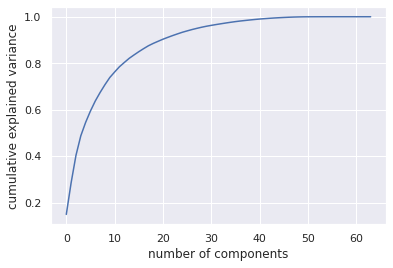

In [12]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

> This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

这条曲线量化了在64维中前$N$个成分的可解释方差占比。例如我们看到使用前10个成分时可解释方差占比为75%，而成分数量需要到达50个左右时，这个比例才能接近100%。

> Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

由上图我们也看到我们的二维投射损失了很多的信息（由可解释方差衡量）我们需要大概20个成分才能获得90%的可解释方差占比。将这个图应用在高维度的数据集上时，能帮助你理解不同维度情况下数据的冗余度情况。

## PCA as Noise Filtering

## 使用PCA去噪

> PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

对于在数据中过滤掉噪音来说PCA也是一个好的方法。这其中的原理是：任何具有较大差异的成分相对来说都不会受到噪音的影响。因此如果你通过保留大部分主成分来重建数据集的话，应该能达到较好的去噪效果。

> Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

让我们来看看它在手写数字数据集中的表现。首先绘制无噪音情况下的数字：

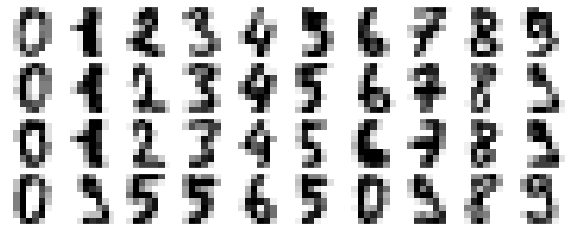

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

> Now lets add some random noise to create a noisy dataset, and re-plot it:

下面我们增加一些随机噪音，来创建一个有噪音的数据集，并绘制数字：

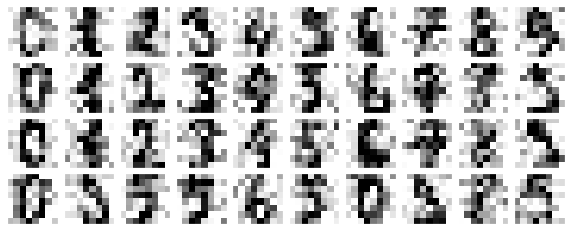

In [14]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

> It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

肉眼可见图像多了一些随机噪音像素点。然后在带噪音的数据上使用PCA，保留50%的可解释方差：

In [15]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

> Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

上面的输出告诉我们，只需要使用12个主成分就可以保留50%的可解释方差。然后我们进行仿射变换，先转换成主成分，再逆转换回来，就可以重建过滤掉噪音后的数字：

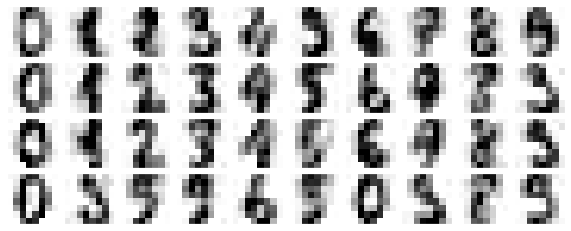

In [16]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

> This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

这个保留信号或过滤噪音的特性使得PCA在特征选择过程中非常有用，例如，与其在非常高维度数据上训练一个分类器，你倒不如在数据的低维度表示中去进行训练，这样做的好处是数据中的随机噪音已经被过滤掉了。

## Example: Eigenfaces

## 例子：特征脸谱

> Earlier we explored an example of using a PCA projection as a feature selector for facial recognition with a support vector machine (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)).
Here we will take a look back and explore a bit more of what went into that.
Recall that we were using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

前面章节我们探索了使用支持向量机（参见[深入：支持向量机](05.07-Support-Vector-Machines.ipynb)）来进行人脸识别，那里我们采用PCA作为特征选择器。下面我们来回顾一下，并且进行更深入的探索。回想之前我们使用过的Wild数据集，Scikit-Learn已经提供了标注：

In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


> Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use ``RandomizedPCA``—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard ``PCA`` estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000).
We will take a look at the first 150 components:

让我们首先查看一下这个数据集的主要成分。因为这是一个较大的数据集，我们会使用`RandomizedPCA`，这个方法会使用一个随机的方法来估算数据集的前$N$个主成分，它比标准的`PCA`评估器要快的多，因此在高维度数据中很有用（本数据集中维度接近3000）。我们看一下前150个主要成分：

译者注：RandomizedPCA在新版Scikit-Learn中已经过时，统一采用PCA，只是需要传递一个`svd_solver='randomized'`参数即可，下面代码做了调整。

In [18]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

> In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors,"
so these types of images are often called "eigenfaces").
As you can see in this figure, they are as creepy as they sound:

然后我们将这些提取出主成分的图像可视化出来，会得到很有趣的结果（这些成分在技术上被成为“特征向量”，因此这些图像经常被称为“特征脸谱”）。正如你下面看到的，这些图像看起来很怪异：

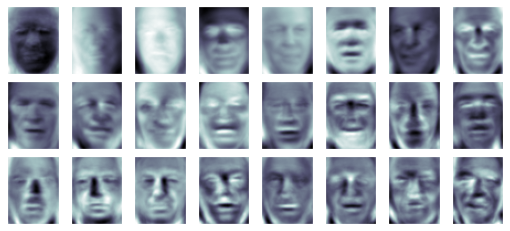

In [19]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

> The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

这些结果很有意思，它们为我们提供了图像内在的差异性：例如，左上角开始的几张特征脸谱看起来像是被不同角度的光照之下的结果，而后面的主要向量则似乎选择了不同的脸部特征，例如眼睛、鼻子和嘴唇等。然后我们看一下这些成分的可解释方差的比例曲线，得到脸部信息保留比例的大概印象：

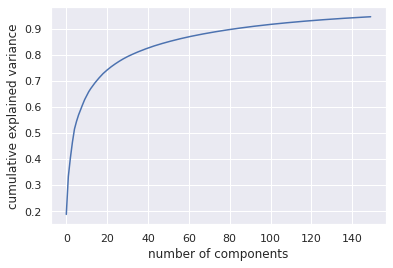

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

> We see that these 150 components account for just over 90% of the variance.
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.
To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

结果表明150个成分已经保留了超过90%的差异。于是我们确信使用这150个主成分，就可以还原大部分数据的特征了。更具体的来说，我们可以将原始图像和通过150个成分还原的图像进行比较：

In [21]:
# 计算主成分和还原的图像
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

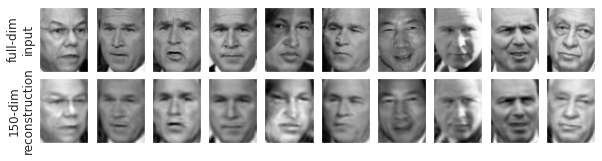

In [22]:
# 绘制结果
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

> The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.
This visualization makes clear why the PCA feature selection used in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.
What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

第一行是原始图像，第二行是通过约3000个初始特征中选出的150个主要特征还原得到的图像。上面的结果很清晰的解释了为什么主成分分析选择的特征在[深入：支持向量机](05.07-Support-Vector-Machines.ipynb)当中应用得如此成功：虽然它将特征的数量减少到初始数量的5%左右，但是它投射得到的图像包含了足够的信息，我们可以通过肉眼就分辨出每张图的个体。这意味着我们的分类算法只需要在150维的数据上进行训练，而不是在3000维数据上进行，这会极大提升分类器的性能。

## Principal Component Analysis Summary

## 主成分分析总结

> In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

本节中我们讨论了使用主成分分析进行降维、对高维数据可视化、去噪和高维数据特征选择的方法。因为PCA算法的可解释性和灵活性，它在大范围的情景和方法中展现了有效性。当面对一个高维数据集时，作者倾向于首先使用PCA来将数据点的关联关系可视化出来（正如我们在手写数字中做的那样），然后试图找到数据中的最主要的可解释方差（正如我们在特征脸谱中做的那样），还有用来理解数据的固有维度量（通过绘制可解释方差比率）。当然PCA也不太适用于非常高维度的数据集，但是它提供了一个直接和有效的探视高维度数据内部特征的途径。

> PCA's main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``RandomizedPCA``, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term (see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)) that serves to enforce sparsity of the components.

PCA的主要缺点在于它容易受到数据中离群值的影响。正因为此，很多更加健壮的PCA变种被开发出来，其中很多都致力于迭代丢弃那些很少被初始成分影响的数据点。Scikit-Learn也包含了一些PCA的有趣的变种，包括`RandomizedPCA`和`SparsePCA`，它们也位于`sklearn.decomposition`包中。`RandomizedPCA`我们上面用来在高维数据中快速的近似的找到主要成分，而`SparsePCA`通过引入一个正则项（参见[深入：线性回归](05.06-Linear-Regression.ipynb)）来强制让成分变得稀疏。

> In the following sections, we will look at other unsupervised learning methods that build on some of the ideas of PCA.

在下面章节中，我们还会看到其他的一些构建在PCA理论基础上的无监督学习的方法。

<!--NAVIGATION-->
< [深入：决策树和随机森林](05.08-Random-Forests.ipynb) | [目录](Index.ipynb) | [深入：流形学习](05.10-Manifold-Learning.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
